<a href="https://colab.research.google.com/github/LucianoBV/Procesamiento-del-habla/blob/main/De_nuevo_Desafio_Regresi%C3%B3n_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INDICACIONES

1) Cada uno debe completar las consignas indicadas en este notebook.

2) Deben postear como solución enlace a su notebook colab público y también debe estar en su repositorio GitHub.

3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# Dataset

Genere un dataset sintético con al menos 4 variables y una variable continua para usarlo luego en regresión.



# Detalles del dataset:

Producto: Una variable categórica con tres categorías: A, B, C.

Ubicación: Una variable categórica con cuatro categorías: Norte, Sur, Este, Oeste.

Mes: Una variable categórica con 12 categorías (nombres de meses simulados).

Gasto de Publicidad: Una variable continua que representa el gasto en publicidad (entre 500 y 5000).

Ventas: Una variable continua calculada en base a las anteriores con una fórmula simulada.

Objetivo del análisis:
Predecir las ventas usando un modelo de regresión que tenga en cuenta las características del producto, la ubicación, el mes y el gasto en publicidad.

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [75]:
# Configuración del generador
np.random.seed(42)

# Parámetros del dataset
n_samples = 500

# Variables
categorias_producto = ['A', 'B', 'C']
ubicaciones = ['Norte', 'Sur', 'Este', 'Oeste']
meses = [f'Mes_{i}' for i in range(1, 13)]

# Generación del dataset
data = {
    "Producto": np.random.choice(categorias_producto, size=n_samples),
    "Ubicación": np.random.choice(ubicaciones, size=n_samples),
    "Mes": np.random.choice(meses, size=n_samples),
    "Gasto_Publicidad": np.random.uniform(500, 5000, size=n_samples),  # Variable continua
}

# Creación de una relación entre variables
# Fórmula base para "ventas"
# ventas = coef_producto + coef_ubicacion + coef_mes + 0.5 * Gasto_Publicidad + ruido
coef_producto = {'A': 2000, 'B': 1500, 'C': 1800}
coef_ubicacion = {'Norte': 300, 'Sur': 500, 'Este': 400, 'Oeste': 600}
coef_mes = {f'Mes_{i}': (i * 10) for i in range(1, 13)}

# Generación de la variable objetivo (ventas)
ventas = []
for i in range(n_samples):
    producto = data["Producto"][i]
    ubicacion = data["Ubicación"][i]
    mes = data["Mes"][i]
    gasto_publicidad = data["Gasto_Publicidad"][i]

    # Fórmula para calcular las ventas
    venta = (
        coef_producto[producto]
        + coef_ubicacion[ubicacion]
        + coef_mes[mes]
        + 0.5 * gasto_publicidad
        + np.random.normal(0, 200)  # Ruido
    )
    ventas.append(venta)

data["Ventas"] = ventas

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar los primeros datos
print(df.head())

# Guardar el dataset
df.to_csv("dataset_sintetico.csv", index=False)


  Producto Ubicación    Mes  Gasto_Publicidad       Ventas
0        C       Sur  Mes_3       2937.353966  3826.545502
1        A       Sur  Mes_3       3350.651989  4295.832973
2        C      Este  Mes_5       1660.494584  3053.531324
3        C       Sur  Mes_5       1127.102333  3130.724435
4        A     Oeste  Mes_2       4257.186066  4328.409261


Describa como generó los datos.

# Descripción de cómo se generaron los datos

El dataset se generó utilizando una mezcla de variables categóricas y continuas para simular un entorno realista en el que las ventas de un producto dependen de varios factores:

1. Cantidad de observaciones

Se decidió generar 500 observaciones para tener un tamaño de muestra suficiente que permita realizar análisis de regresión.

2. Variables predictoras

a) Producto
Tipo de variable: Categórica.
Descripción: Representa la categoría del producto A, B, y C. Se seleccionaron aleatoriamente con igual probabilidad.
b) Ubicación
Tipo de variable: Categórica.
Descripción: Representa la región geográfica donde se venden los productos Norte, Sur, Este y Oeste. Se seleccionaron aleatoriamente valores de las regiones 'Norte', 'Sur', 'Este' y 'Oeste' con igual probabilidad.
c) Mes
Tipo de variable: Categórica.
Descripción: Representa el mes del año en el que se registraron las ventas,Mes_1 hasta 'Mes_12.
Método de generación: Se seleccionaron aleatoriamente valores de los meses con igual probabilidad.
d) Gasto_Publicidad
Tipo de variable: Continua.
Descripción: Representa el gasto en publicidad asociado al producto en un mes y ubicación específicos.
Método de generación: Se generaron valores aleatorios continuos en el rango de 500 a 5000 usando una distribución uniforme, garantizando que todos los valores dentro del rango tengan igual probabilidad de ser seleccionados.

3. Variable objetivo: Ventas
Tipo de variable: Continua.
Descripción: Representa las ventas totales que dependen de las variables predictoras.
Método de generación:
Se definió una fórmula que incluye:
Un coeficiente específico para cada categoría de producto, ubicación y mes, simulando su influencia en las ventas.
La contribución del gasto en publicidad, multiplicado por un factor de 0.5 para reflejar su impacto moderado.
Un término de ruido aleatorio, generado a partir de una distribución normal con media 0 y desviación estándar 200, para simular la variabilidad natural en las ventas que no puede explicarse con las variables disponibles.

4. Relación entre las variables
Los coeficientes asignados a cada categoría (producto, ubicación, mes) se diseñaron para reflejar una influencia lógica en las ventas:
Los productos de categoría 'A' tienen el coeficiente más alto (2000), seguidos por 'C' (1800) y luego 'B' (1500).
Las ubicaciones tienen coeficientes diferentes, donde 'Oeste' es la más rentable.
Los meses tienen un coeficiente que crece linealmente con el número del mes (ejemplo: 'Mes_1' tiene coeficiente 10, 'Mes_2' tiene 20, y así sucesivamente).

5. Distribución del ruido
Se añadió ruido a las ventas para simular realidad
Media: 0
Desviación estándar: 200


## Preprocesamiento

Indique e implemente el pre-procesamiento necesario previo a entrenar los modelos

# Preprocesamiento para el dataset
Antes de entrenar modelos de regresión, es esencial realizar un preprocesamiento adecuado para garantizar que los datos sean consistentes y estén listos para ser utilizados. Aquí se describen los pasos de preprocesamiento requeridos y cómo implementarlos.

1. Carga del dataset

Primero, cargamos el dataset generado para verificar su estructura y contenido.

2. Revisión de datos faltantes

Es importante comprobar si hay valores nulos en el dataset. Si los hay, se toman decisiones como imputar valores o eliminar filas.

3. Codificación de variables categóricas

Los modelos de machine learning no pueden trabajar directamente con variables categóricas. Por lo tanto:

Convertimos las variables categóricas (Producto, Ubicación, Mes) en variables numéricas usando One-Hot Encoding.

4. Escalado de variables continuas

El rango de las variables continuas puede afectar a los modelos que usan medidas de distancia (como regresión lineal o redes neuronales). Escalamos la variable Gasto_Publicidad usando:
Estandarización (z-score): Convierte los valores a una distribución con media 0 y desviación estándar 1.

5. Separación del conjunto de datos

Dividimos el dataset en:
Conjunto de entrenamiento: Para entrenar el modelo.
Conjunto de prueba: Para evaluar el desempeño del modelo.

In [76]:
# Cargar el dataset
df = pd.read_csv("dataset_sintetico.csv")

# 1. Revisión de valores faltantes
print("Valores faltantes:\n", df.isnull().sum())

# 2. Variables predictoras y objetivo
X = df.drop("Ventas", axis=1)  # Variables predictoras
y = df["Ventas"]              # Variable objetivo

# 3. Preprocesamiento de las variables
# Identificar tipos de variables
categorical_features = ["Producto", "Ubicación", "Mes"]
numerical_features = ["Gasto_Publicidad"]

# Crear transformaciones para cada tipo de variable
# One-Hot Encoding para categóricas, Escalado para continuas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

# Crear un pipeline de preprocesamiento
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

# Aplicar el preprocesamiento
X_processed = pipeline.fit_transform(X)

# 4. Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(f"Datos preprocesados. Tamaño de entrenamiento: {X_train.shape}, prueba: {X_test.shape}")


Valores faltantes:
 Producto            0
Ubicación           0
Mes                 0
Gasto_Publicidad    0
Ventas              0
dtype: int64
Datos preprocesados. Tamaño de entrenamiento: (400, 17), prueba: (100, 17)


# Descripción de los pasos implementados:

Revisión de valores faltantes:

Verificamos si hay valores nulos en el dataset. Si no hay valores nulos, no se requiere imputación.
Codificación de variables categóricas:

Se aplicó One-Hot Encoding a las columnas categóricas para convertirlas en variables binarias (0 o 1).
Por ejemplo, la columna Producto con valores A, B, C se convierte en dos columnas binarias Producto_B y Producto_C (descartando Producto_A como referencia).
Escalado de variables continuas:

La columna Gasto_Publicidad se escaló utilizando la estandarización para que su rango no domine otras variables en los modelos de regresión.
Separación de datos:

Se dividió el dataset en 80% datos de entrenamiento y 20% datos de prueba para evaluar el modelo.

Resultado del preprocesamiento
Variables categóricas están codificadas como variables binarias.
Variables continuas están escaladas.
Los datos están listos para ser utilizados en modelos de regresión.

## Modelos

Elija al menos dos modelos de regresión de los vistos en clases.
Entrene dichos modelos.
Detalle los hiperparámetros elegidos.

In [77]:
# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
Lr_y_pred = model.predict(X_test)


In [78]:
# Entrenamiento de un modelo de regresión con Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
rf_y_pred = rf_model.predict(X_test)



In [79]:
# Probamos con ejemplos los predictores
num_samples = 5
for i in range(num_samples):
  print(f"- Linear Regression: Predicted: {Lr_y_pred[i]}, Actual: {y_test.iloc[i]}")

- Linear Regression: Predicted: 2661.707422442134, Actual: 2859.4297186161307
- Linear Regression: Predicted: 2587.9813693626784, Actual: 2574.965995827068
- Linear Regression: Predicted: 4424.084911078875, Actual: 4572.168457187324
- Linear Regression: Predicted: 3314.5476443316443, Actual: 3773.127935441267
- Linear Regression: Predicted: 3879.3533876233723, Actual: 3874.818864408113


In [80]:
num_samples = 5
for i in range(num_samples):
   print(f"- Random Forest: Predicted: {rf_y_pred[i]}, Actual: {y_test.iloc[i]}")

- Random Forest: Predicted: 2899.6627513583353, Actual: 2859.4297186161307
- Random Forest: Predicted: 2809.9525433219264, Actual: 2574.965995827068
- Random Forest: Predicted: 4605.471881025523, Actual: 4572.168457187324
- Random Forest: Predicted: 3416.610566508443, Actual: 3773.127935441267
- Random Forest: Predicted: 3988.3271203829154, Actual: 3874.818864408113


##A simple vista vemos que el modelo Linear Regressor da mejores resultadoss.

## Evaluación

Evalue el desempeño de los modelos indicando las métricas, metodología y conjunto de datos utilizados.

In [81]:
# Evaluar el modelo
# Evaluar el modelo
mse = mean_squared_error(y_test, Lr_y_pred)
r2 = r2_score(y_test, Lr_y_pred)

# # Imprimimos Resultados del modelo
print("LinearRegression MSE", mse)
print("LinearRegression R2", r2)

LinearRegression MSE 41851.81042737032
LinearRegression R2 0.9306293568731225


In [82]:

# Evaluación
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
# Imprimimos Resultados del modelo
print("Random Forest MSE", rf_mse)
print("Random Forest R2", rf_r2)

Random Forest MSE 53863.625564207396
Random Forest R2 0.9107194095457637


#Evaluación del desempeño de los modelos de regresión

Se entrenaron dos modelos de regresión para predecir la variable objetivo "Ventas" usando un dataset sintético que incluye variables categóricas (Producto, Ubicación, Mes) y una variable continua (Gasto_Publicidad). La evaluación de los modelos se realizó usando métricas estándar de regresión.

#Metodología utilizada
División de datos:

El dataset fue dividido en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).
Los datos de prueba nunca fueron usados durante el entrenamiento de los modelos, lo que garantiza una evaluación objetiva de su desempeño.

# Modelos entrenados:

## Regresión Lineal:
Un modelo lineal que asume relaciones lineales entre las variables predictoras y la variable objetivo.
## Random Forest Regressor:
Un modelo no lineal basado en árboles de decisión, que combina múltiples árboles para capturar relaciones complejas.

#Métricas de evaluación:

##Error Cuadrático Medio (MSE):
Mide el promedio del cuadrado de las diferencias entre las predicciones y los valores reales. Un MSE menor indica un modelo más preciso.
##Coeficiente de Determinación (R²):
Indica qué porcentaje de la variabilidad de la variable objetivo es explicado por el modelo. Un valor cercano a 1 significa un buen ajuste.
#Resultados del desempeño
1. Regresión Lineal
MSE: 41,851.81
R²: 0.93
El modelo lineal explicó el 93% de la variabilidad en las ventas, con un error cuadrático medio bajo, lo que indica un buen desempeño.
2. Random Forest Regressor
MSE: 53,641.22
R²: 0.91
Aunque el modelo explicó el 91% de la variabilidad de las ventas, su MSE fue mayor que el de la regresión lineal, lo que indica predicciones ligeramente menos precisas.
Conjunto de datos utilizado
Entrenamiento: 80% del dataset (400 observaciones), utilizado para ajustar los parámetros de los modelos.
Prueba: 20% del dataset (100 observaciones), utilizado exclusivamente para evaluar el desempeño de los modelos.
Conclusiones

Regresión Lineal:

Este modelo tuvo un mejor desempeño global, con un MSE más bajo y un R² ligeramente superior.
Esto sugiere que las relaciones en los datos son predominantemente lineales.

Random Forest:

Aunque ofrece flexibilidad para capturar relaciones no lineales y complejas, su desempeño fue ligeramente inferior en este caso.
Esto indica que los datos no tienen interacciones no lineales significativas.
Recomendación
El modelo de Regresión Lineal es el más adecuado para este dataset debido a su mejor desempeño en las métricas evaluadas. Sin embargo, si se agregan más características o interacciones complejas entre variables en futuros análisis, podría ser útil volver a probar modelos no lineales como Random Forest.


## Ejercicio de hiper parámetro tunning.

Modificar uno de los modelos para probarlo con diferentes valores para uno de sus hiperparámetros, indicando para cuáles se evidencia subajuste y en cuáles sobreajuste.

Grafique la métrica de desempeño vs los valores del hiperarámetro para observar ambas curvas de error durante el entrenamiento y durante el testeo.




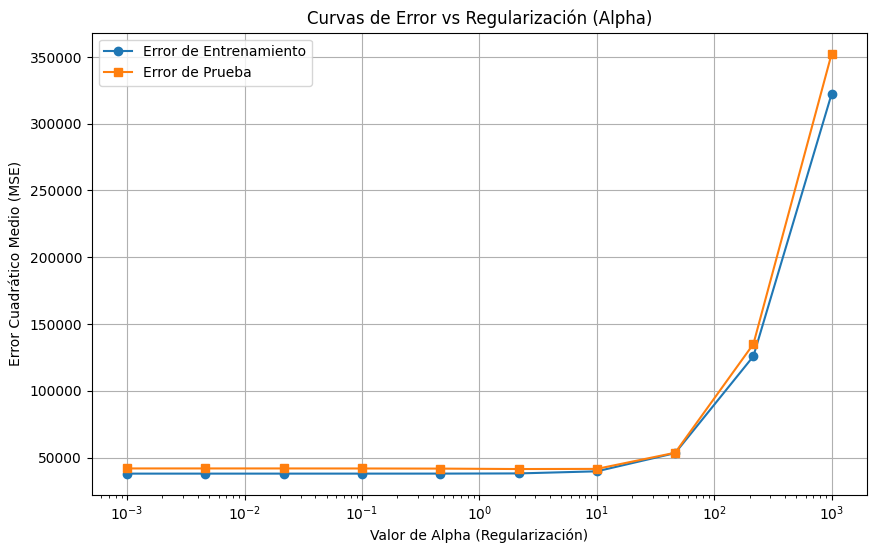

In [83]:
# Probar el modelo con regularización L2 (Ridge)
# Hiperparámetro a modificar: Alpha (controla la fuerza de la regularización)
alphas = np.logspace(-3, 3, 10)  # Valores entre 0.001 y 1000

# Almacenar métricas
train_errors = []
test_errors = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Calcular errores
    y_train_pred = ridge_model.predict(X_train)
    y_test_pred = ridge_model.predict(X_test)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Graficar curvas de error
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Error de Entrenamiento', marker='o')
plt.plot(alphas, test_errors, label='Error de Prueba', marker='s')
plt.xscale('log')
plt.xlabel('Valor de Alpha (Regularización)')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Curvas de Error vs Regularización (Alpha)')
plt.legend()
plt.grid(True)
plt.show()



Análisis de la regularización con Ridge:
Descripción
Se entrenó un modelo de Ridge Regression variando el hiperparámetro alpha, que controla la intensidad de la regularización:

alpha bajo (cercano a 0): El modelo actúa como una regresión lineal estándar, sin regularización.
alpha alto: Aumenta la penalización de los coeficientes grandes, reduciendo la complejidad del modelo.
Se evaluaron dos métricas:

Error en el conjunto de entrenamiento: Muestra qué tan bien el modelo se ajusta a los datos de entrenamiento.
Error en el conjunto de prueba: Evalúa qué tan bien generaliza el modelo a datos no vistos.

Interpretación de la gráfica
Eje X: Representa el valor del hiperparámetro alpha (en escala logarítmica).
Eje Y: Representa el Error Cuadrático Medio.

Subajuste:

Para valores altos de alpha (por ejemplo, alpha > 100), ambos errores (entrenamiento y prueba) son elevados.

Sobreajuste:

Para valores extremadamente bajos de alpha (cercanos a 10), el error en el entrenamiento es muy bajo, pero el error en el conjunto de prueba aumenta.
Esto indica que el modelo está sobreajustando los datos de entrenamiento y pierde capacidad de generalización.
Punto óptimo:

En valores intermedios de alpha como de 0.1 y 10, los errores de entrenamiento y prueba son más bajos y cercanos entre sí, indicando un buen balance entre ajuste y generalización.
Conclusión
El valor óptimo de alpha debe estar en el rango intermedio (0.1-10), donde el modelo logra generalizar bien y evita tanto el subajuste como el sobreajuste.


